# Import library

In [277]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [278]:
df = pd.read_csv('../data/data.csv')

# Data overview

In [279]:
def describle_data():
    print('Shape of data:\n', df.shape)
    print('--'*20)
    print('Columns of data: \n', df.columns)
    print('--'*20)
    print('Data types of data: \n', df.dtypes)
    print('--'*20)
    print('Missing values of data: \n', df.isnull().sum())
    print('--'*20)
    print('Describe data: \n', df.describe())
    print('--'*20)
    print('Info data: \n', df.info())
describle_data()

Shape of data:
 (26956, 11)
----------------------------------------
Columns of data: 
 Index(['car_name', 'year', 'price', 'assemble_place', 'series', 'driven kms',
       'num_of_door', 'num_of_seat', 'engine_type', 'transmission', 'url'],
      dtype='object')
----------------------------------------
Data types of data: 
 car_name           object
year               object
price              object
assemble_place     object
series             object
driven kms        float64
num_of_door       float64
num_of_seat       float64
engine_type        object
transmission       object
url                object
dtype: object
----------------------------------------
Missing values of data: 
 car_name          38
year              11
price             11
assemble_place    11
series            11
driven kms        11
num_of_door       11
num_of_seat       11
engine_type       11
transmission      11
url               11
dtype: int64
----------------------------------------
Describe data: 
     

# Xóa bỏ những xe bị trùng lặp

In [280]:
df.drop_duplicates(subset=['url'], inplace=True)
describle_data()

Shape of data:
 (25157, 11)
----------------------------------------
Columns of data: 
 Index(['car_name', 'year', 'price', 'assemble_place', 'series', 'driven kms',
       'num_of_door', 'num_of_seat', 'engine_type', 'transmission', 'url'],
      dtype='object')
----------------------------------------
Data types of data: 
 car_name           object
year               object
price              object
assemble_place     object
series             object
driven kms        float64
num_of_door       float64
num_of_seat       float64
engine_type        object
transmission       object
url                object
dtype: object
----------------------------------------
Missing values of data: 
 car_name          35
year               1
price              1
assemble_place     1
series             1
driven kms         1
num_of_door        1
num_of_seat        1
engine_type        1
transmission       1
url                1
dtype: int64
----------------------------------------
Describe data: 
     

# Chuyển đổi kiểu dữ liệu cho các cột year, price sang kiểu số thực để có thể thực hiện các phép tính toán

Year

In [281]:
def process_year_colum(year):
    if year.isdigit():
        return float(year)
    else:
        return 0
df['year'] = df['year'].astype(str).apply(process_year_colum)
describle_data()

Shape of data:
 (25157, 11)
----------------------------------------
Columns of data: 
 Index(['car_name', 'year', 'price', 'assemble_place', 'series', 'driven kms',
       'num_of_door', 'num_of_seat', 'engine_type', 'transmission', 'url'],
      dtype='object')
----------------------------------------
Data types of data: 
 car_name           object
year              float64
price              object
assemble_place     object
series             object
driven kms        float64
num_of_door       float64
num_of_seat       float64
engine_type        object
transmission       object
url                object
dtype: object
----------------------------------------
Missing values of data: 
 car_name          35
year               0
price              1
assemble_place     1
series             1
driven kms         1
num_of_door        1
num_of_seat        1
engine_type        1
transmission       1
url                1
dtype: int64
----------------------------------------
Describe data: 
     

Price

In [282]:
def process_price(price):
    try:
        if price.find('Tỷ') != -1:
            ty= price.split('Tỷ')[0]
            trieu = price.split('Tỷ')[1]
            trieu = trieu.split('Triệu')[0]
            return float(ty)*1000000000 + float(trieu)*1000000
        elif price.find('Triệu') != -1:
            trieu = price.split('Triệu')[0]
            trieu = trieu.replace(' ','')
            return float(trieu)*1000000
        else:
            return 0
    except:
        return 0
df['price'] = df['price'].astype(str).apply(process_price)

# Xử lý các cột dạng nhãn

Car_name có hai phần là hãng xe và tên xe, ta sẽ tách ra thành hai cột là brand và model


In [283]:
df['brand'] = df['car_name'].str.split().str[0]
df['model'] = df['car_name'].str.split().str[1:].str.join(' ')

In [284]:
df.head()

,car_name,year,price,assemble_place,series,driven kms,num_of_door,num_of_seat,engine_type,transmission,url,brand,model
0,LandRover Range Rover HSE 3.0,2015.0,2.700000e+09,Nhập khẩu,SUV,65000.0,5.0,5.0,Xăng,Số tự động,https://bonbanh.com/xe-landrover-range_rover-h...,LandRover,Range Rover HSE 3.0
1,Mitsubishi Outlander 2.0 CVT Premium,2018.0,6.660000e+08,Lắp ráp trong nước,SUV,50000.0,5.0,7.0,Xăng,Số tự động,https://bonbanh.com/xe-mitsubishi-outlander-2....,Mitsubishi,Outlander 2.0 CVT Premium
2,Mazda 3 1.5L Luxury,2019.0,4.900000e+08,Lắp ráp trong nước,Sedan,51000.0,4.0,5.0,Xăng,Số tự động,https://bonbanh.com/xe-mazda-3-1.5l-luxury-201...,Mazda,3 1.5L Luxury
3,Mazda 2 1.5 AT,2015.0,3.650000e+08,Lắp ráp trong nước,Sedan,38000.0,4.0,5.0,Xăng,Số tự động,https://bonbanh.com/xe-mazda-2-1.5-at-2015-491...,Mazda,2 1.5 AT
4,Suzuki Swift GLX 1.2 AT,2021.0,5.650000e+08,Nhập khẩu,Hatchback,6000.0,5.0,5.0,Xăng,Số tự động,https://bonbanh.com/xe-suzuki-swift-glx-1.2-at...,Suzuki,Swift GLX 1.2 AT


# Xử lý các dữ liệu bị thiếu hoặc sai


Xử lý cột year

In [285]:
car_before_1990 = df[df['year'] < 1990]
print('Number of car before 1990: ', car_before_1990.shape[0])
print('Number of car before 1990: ', car_before_1990['year'].value_counts())

Number of car before 1990:  239
Number of car before 1990:  year
0.0      237
200.0      1
700.0      1
Name: count, dtype: int64


Điền các giá trị sai trong cột year bằng giá trị xuất hiện nhiều nhất trong cột year

In [286]:
df['year'] = df['year'].apply(lambda x: df['year'].value_counts().index[0] if x < 1990 else x)

Cột price: các giá trị bằng = 0 sẽ được thay thế bằng giá trung bình của các xe sản xuất trong năm đó

In [287]:
df['price'] = df['price'].apply(lambda x: df[df['year'] == x]['price'].mean() if x == 0 else x)
df['price'].describe()

count    2.483900e+04
mean     1.077909e+09
std      1.670939e+09
min      1.500000e+07
25%      3.930000e+08
50%      5.650000e+08
75%      9.500000e+08
max      3.860000e+10
Name: price, dtype: float64

Cột num_of_door
Thông thường các xe có tối đa 5 - 6 cửa, với những giá trị sai ta sẽ điền bằng giá trị xuất hiện nhiều nhất trong cột num_of_door

In [288]:
df['num_of_door'] = df['num_of_door'].apply(lambda x: df['num_of_door'].value_counts().index[0] if x > 6 else x)

Cột brand

In [289]:
df['brand'].value_counts()

brand
Toyota        4798
Mercedes      2933
Hyundai       2832
Kia           2681
Ford          2236
              ... 
Scion            1
<<<<<<<          1
Dothanh          1
B                1
Brilliance       1
Name: count, Length: 86, dtype: int64

Cột brand có một số hãng có số lượng xe rất ít hoặc bị thiếu, ta sẽ gộp các hãng xe này thành một nhóm là 'other'
Nếu số xe của hãng đó nhỏ hơn 10 thì sẽ gộp vào nhóm 'Other'

In [290]:
threshold = 10
car_count = df['brand'].value_counts()
small_brands = car_count[car_count < threshold].index.tolist()
df['brand'] = df['brand'].apply(lambda x: 'Other' if x in small_brands else x)


In [291]:
df['brand'].value_counts()

brand
Toyota        4798
Mercedes      2933
Hyundai       2832
Kia           2681
Ford          2236
Mazda         1918
Mitsubishi    1020
Lexus         1004
Honda          994
VinFast        668
Chevrolet      577
BMW            499
LandRover      408
Porsche        402
Nissan         340
Suzuki         284
Audi           251
Peugeot        234
Daewoo         198
Volvo          104
Other           99
Isuzu           94
Bentley         66
Rolls           54
Volkswagen      52
MG              41
Mini            38
Lincoln         36
Thaco           33
Jeep            28
Jaguar          26
Ssangyong       25
Subaru          23
Maserati        23
Land            22
Acura           15
Infiniti        15
Dongben         14
Cadillac        13
Daihatsu        13
Fiat            11
Name: count, dtype: int64

Cột series: ta thấy các giá trị của cột series đều là các series chính xác, ta sẽ không xử lý cột này

In [292]:
df['series'].value_counts()

series
Sedan                    9057
SUV                      8498
Hatchback                2545
Crossover                2014
Bán tải / Pickup       1730
Van/Minivan               859
Truck                     176
Coupe                     174
Convertible/Cabriolet      98
Wagon                       5
Name: count, dtype: int64

Cột engine_type: ta thấy có một vài giá trị bị thiếu, ta sẽ điền các giá trị này bằng giá trị xuất hiện nhiều nhất trong cột engine_type

In [293]:
df['engine_type'] = df['engine_type'].apply(lambda x: df['engine_type'].value_counts().index[0] if x == '-' else x)
df['engine_type'].value_counts()

engine_type
Xăng      21257
Dầu        3712
Hybrid      131
Điện         56
Name: count, dtype: int64

Cột transmission tương tự cột engine_type

In [294]:
df['transmission'] = df['transmission'].apply(lambda x: df['transmission'].value_counts().index[0] if x == '-' else x)
df['transmission'].value_counts()

transmission
Số tự động    21343
Số tay         3813
Name: count, dtype: int64

# Trực quan hóa dữ liệu

Tìm hiểu về mối liên hệ giữa giá xe và các thuộc tính khác

D:\2022.2\Old-car-price-prediction\venv\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
D:\2022.2\Old-car-price-prediction\venv\Lib\site-packages\numpy\lib\nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


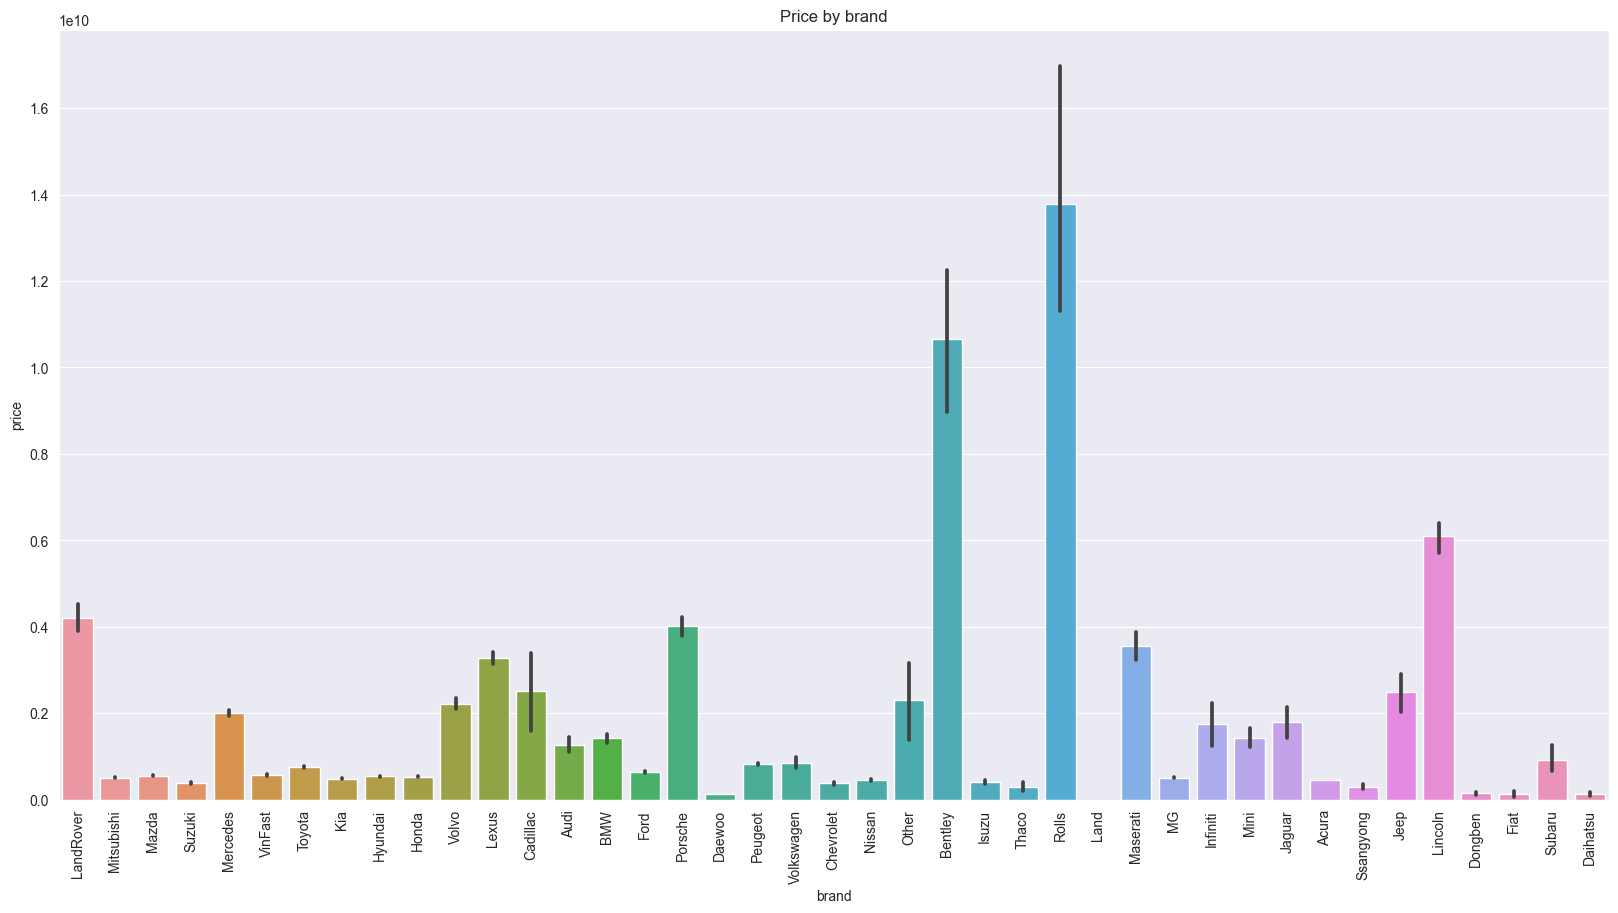

In [295]:
#vẽ price theo brand, series,year
plt.figure(figsize=(20, 10))
sns.barplot(x='brand', y='price', data=df)
plt.title('Price by brand')
plt.xticks(rotation=90)
plt.show()

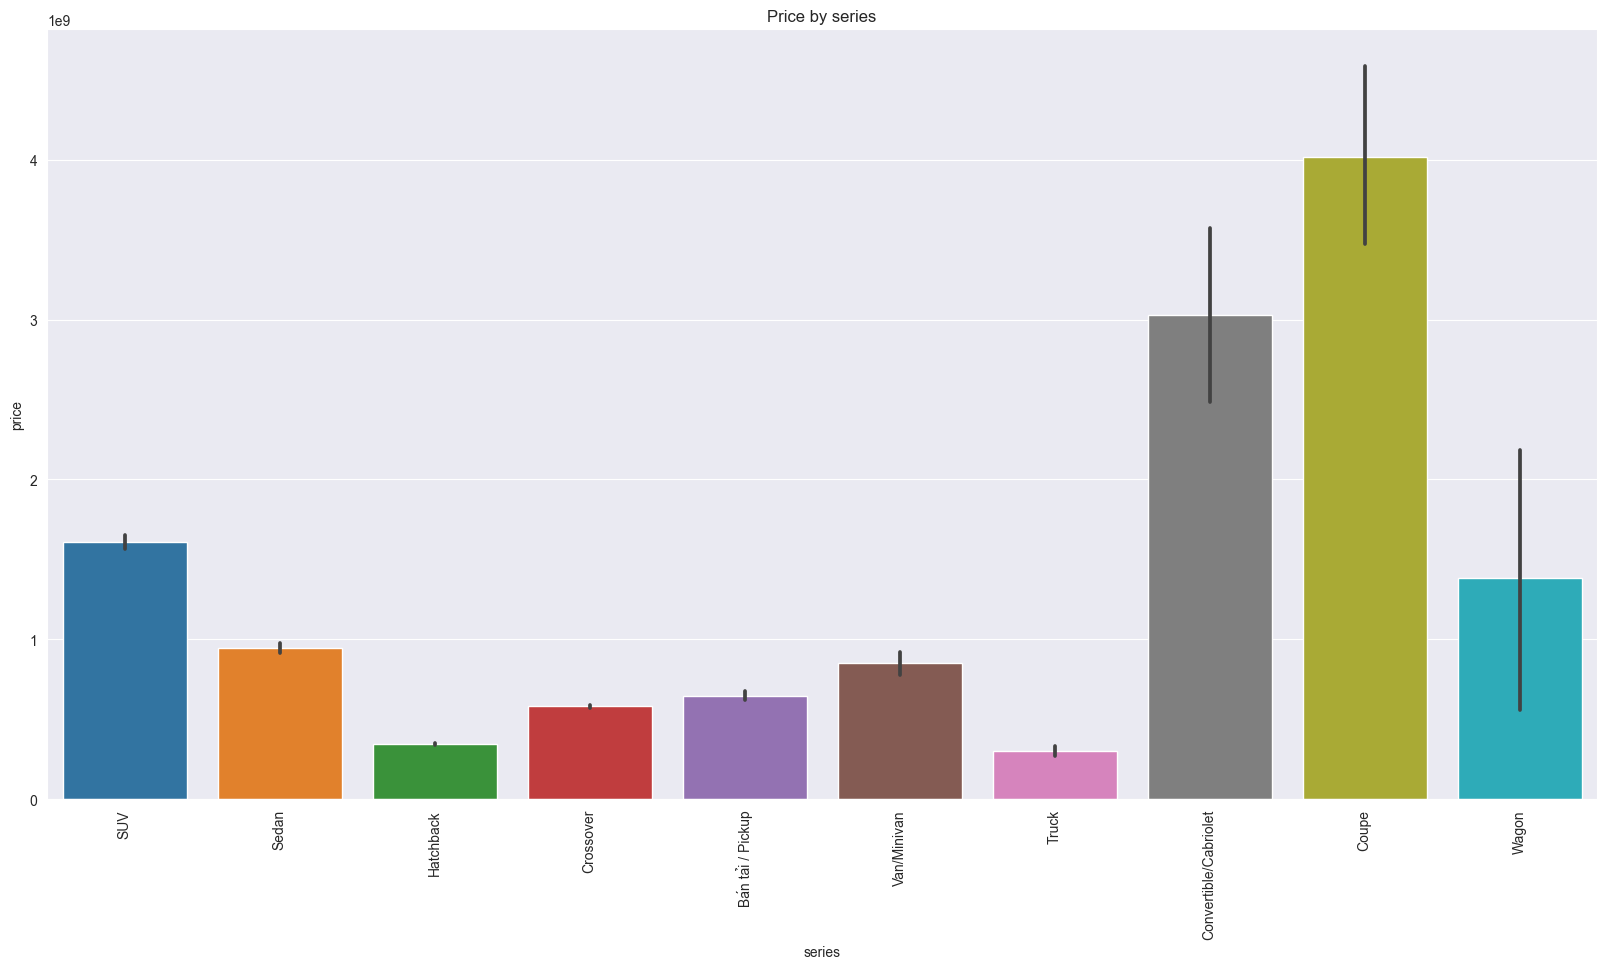

In [296]:
plt.figure(figsize=(20, 10))
sns.barplot(x='series', y='price', data=df)
plt.title('Price by series')
plt.xticks(rotation=90)
plt.show()

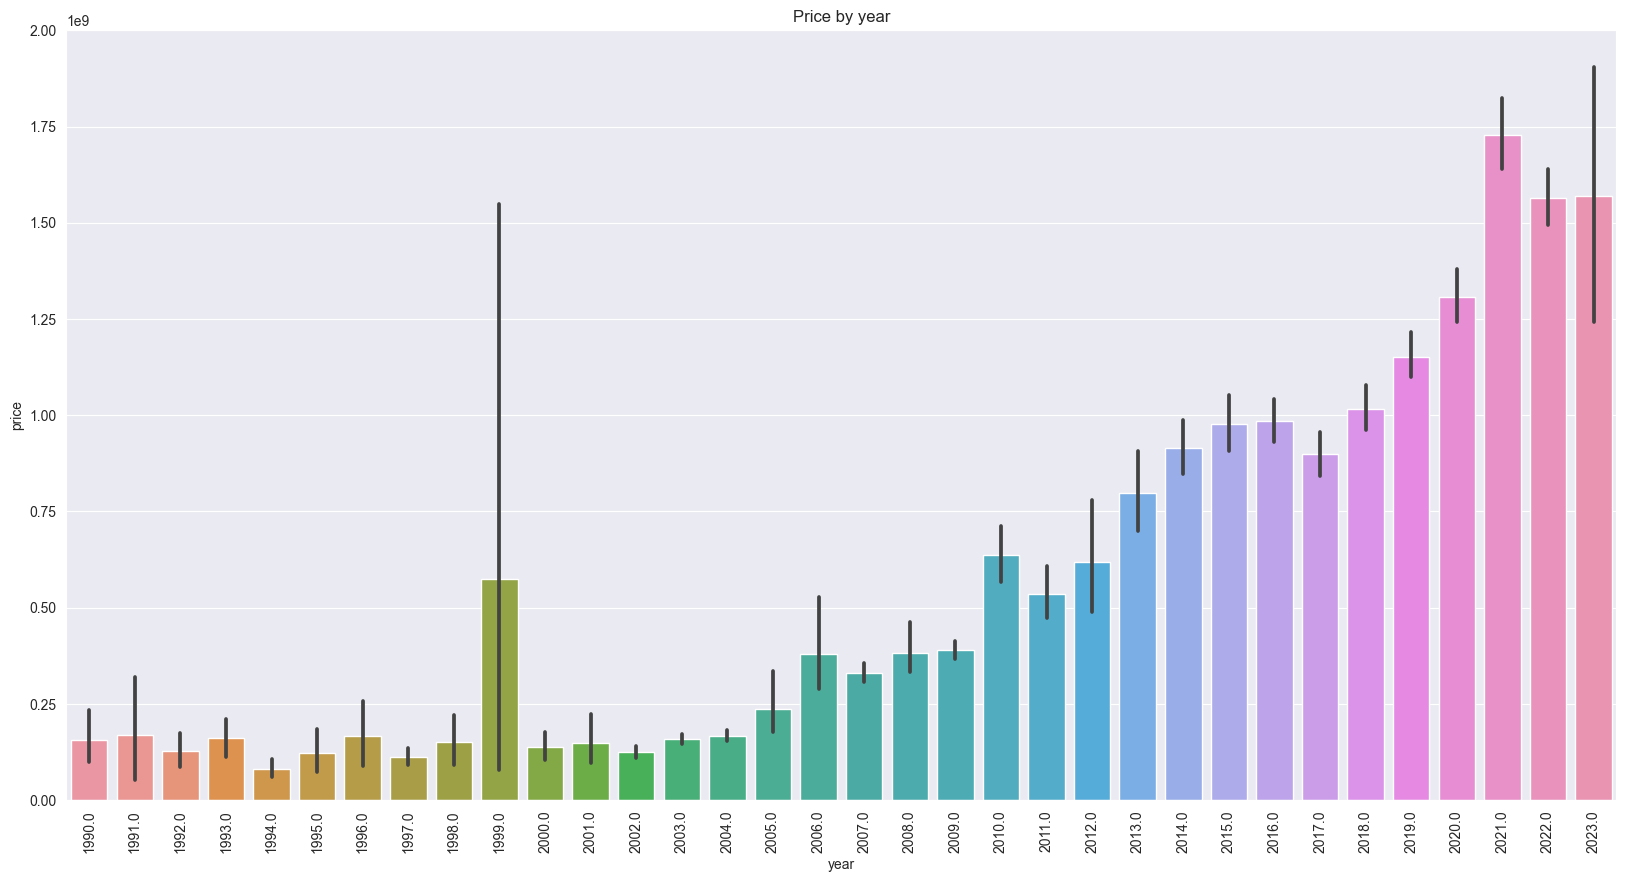

In [297]:
plt.figure(figsize=(20, 10))
sns.barplot(x='year', y='price', data=df)
plt.title('Price by year')
plt.xticks(rotation=90)
plt.show()

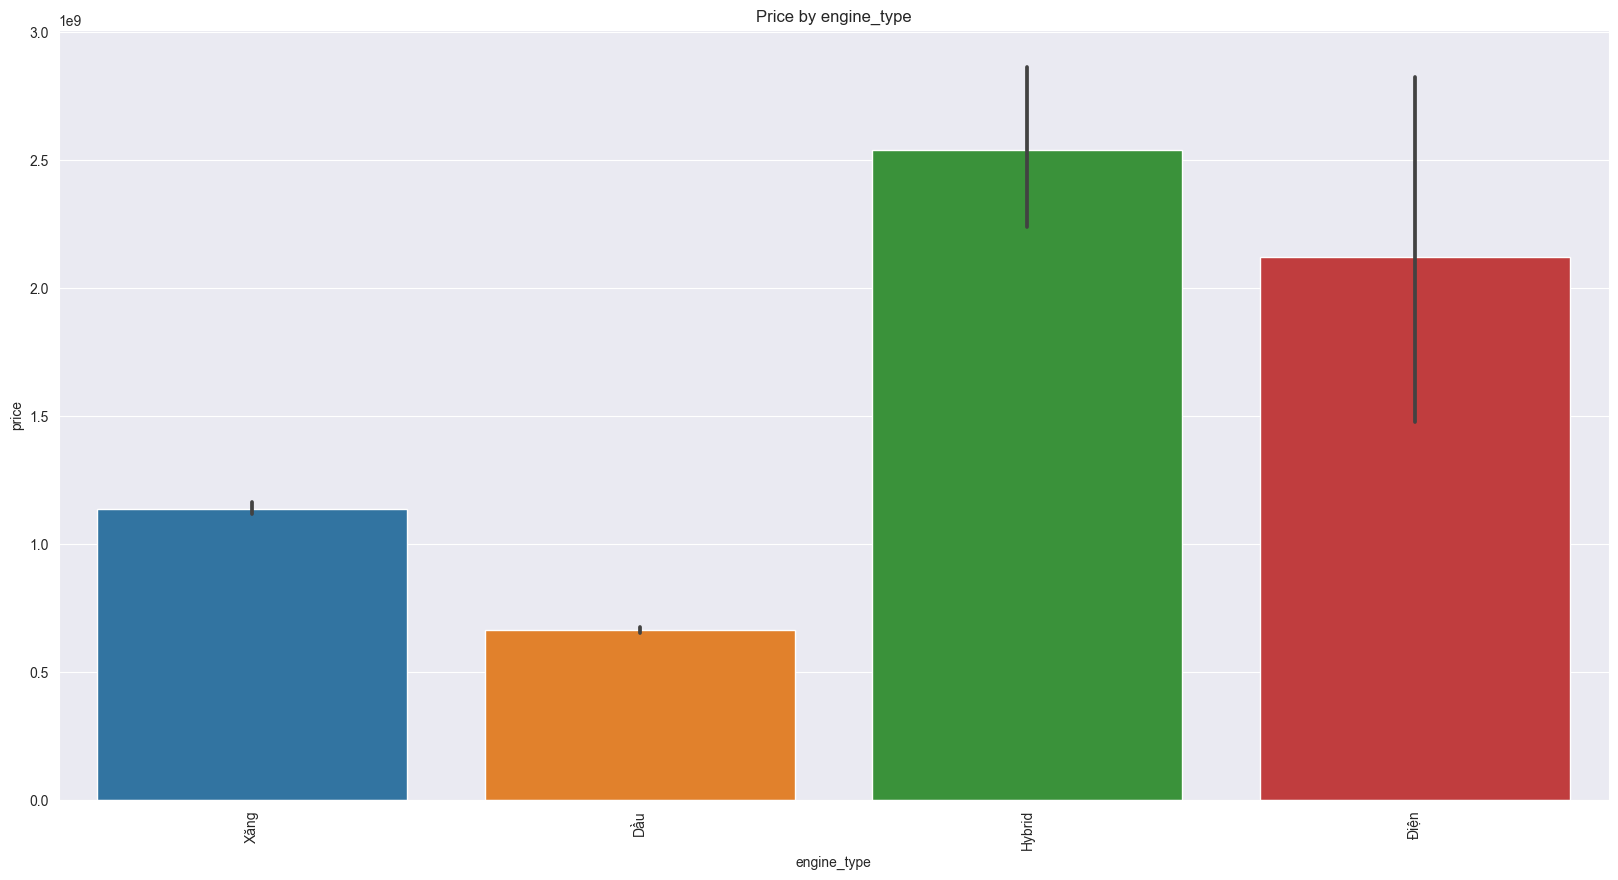

In [298]:
plt.figure(figsize=(20, 10))
sns.barplot(x='engine_type', y='price', data=df)
plt.title('Price by engine_type')
plt.xticks(rotation=90)
plt.show()


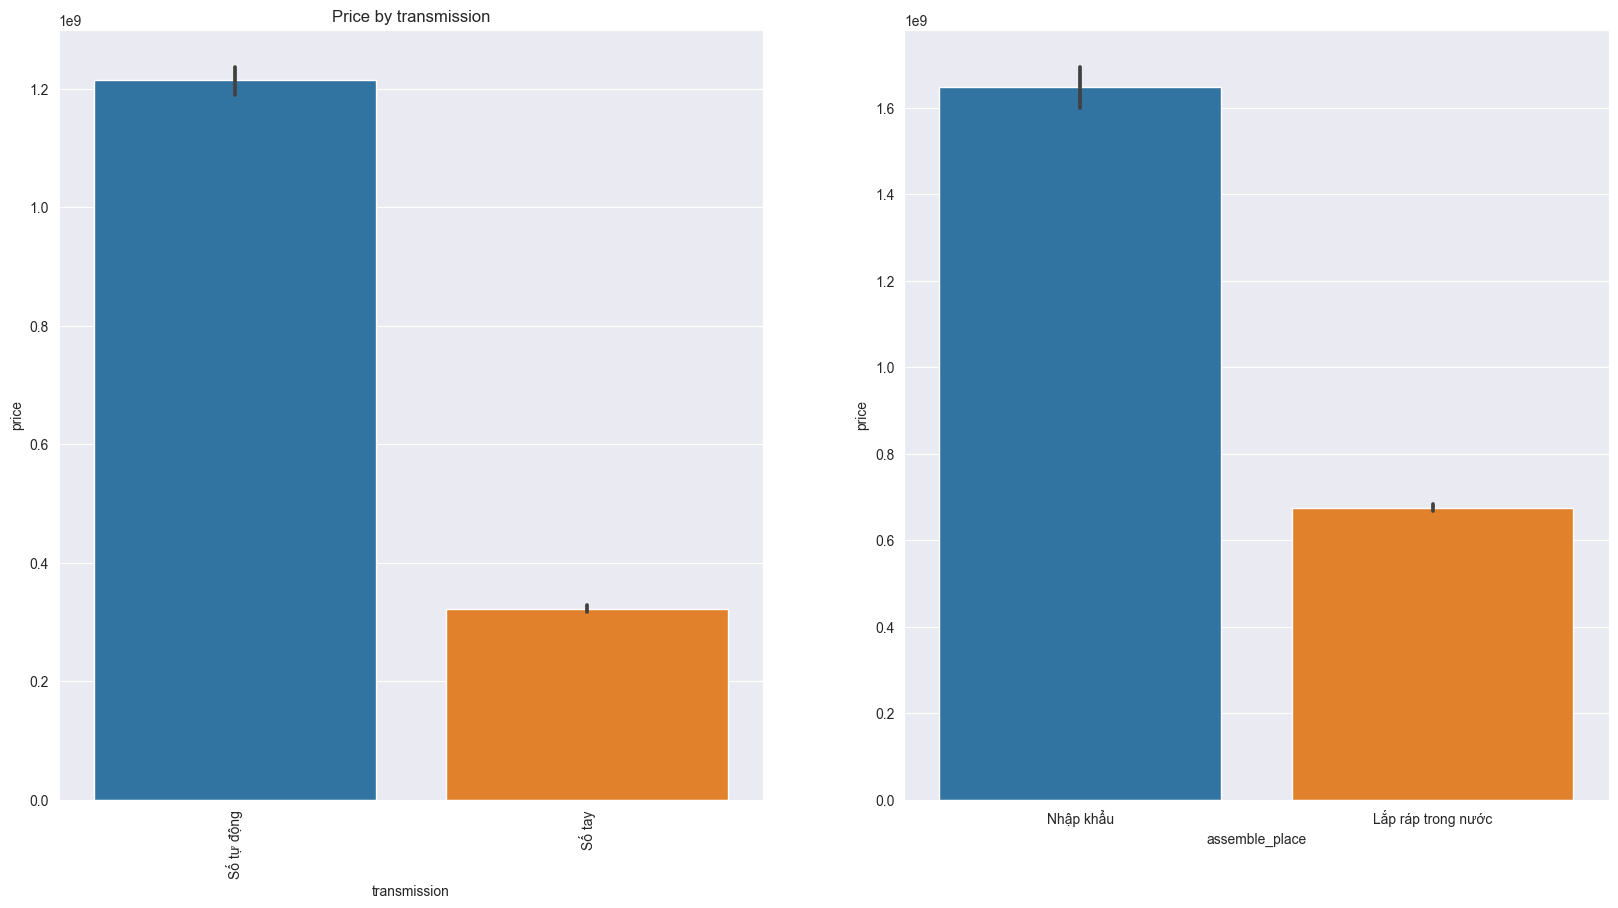

In [299]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.barplot(x='transmission', y='price', data=df)
plt.title('Price by transmission')
plt.xticks(rotation=90)
plt.subplot(1, 2, 2)
sns.barplot(x='assemble_place', y='price', data=df)
plt.show()

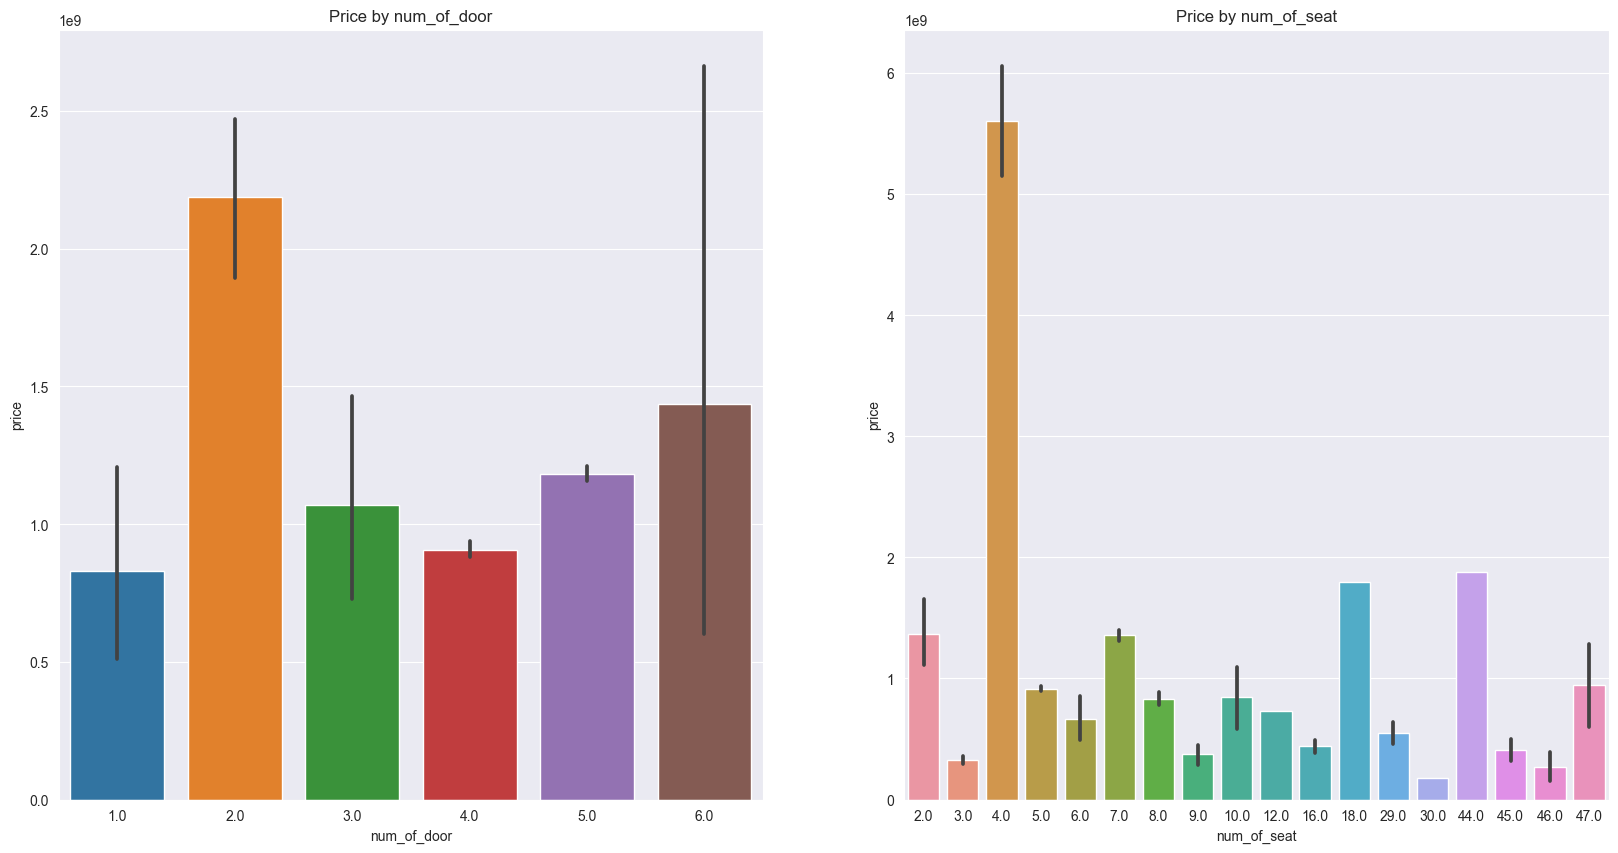

In [300]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.barplot(x='num_of_door', y='price', data=df)
plt.title('Price by num_of_door')
plt.subplot(1, 2, 2)
sns.barplot(x='num_of_seat', y='price', data=df)
plt.title('Price by num_of_seat')
plt.show()

# Mã hóa các cột dạng nhãn thành dạng số để có thể sử dụng cho mô hình học máy

Cột assemble_place chỉ có 2 giá trị là 'Lắp ráp trong nước' và 'Nhập khẩu', ta sẽ mã hóa thành 0 và 1

In [301]:
df['assemble_place'] = df['assemble_place'].map({'Lắp ráp trong nước': 0, 'Nhập khẩu': 1})

In [302]:
df['assemble_place'].value_counts()

assemble_place
0.0    14676
1.0    10480
Name: count, dtype: int64

Cột brand sẽ được mã hóa bằng phương pháp One-hot encoding

In [303]:
one_hot = OneHotEncoder()
one_hot.fit(df[['brand']])
one_hot.categories_
one_hot_brand = one_hot.transform(df[['brand']]).toarray()
one_hot_brand = pd.DataFrame(one_hot_brand, columns=one_hot.categories_)
df = pd.concat([df, one_hot_brand], axis=1)


Cột series sẽ được mã hóa bằng phương pháp One-hot encoding

In [304]:
one_hot = OneHotEncoder()
one_hot.fit(df[['series']])
one_hot.categories_
one_hot_series = one_hot.transform(df[['series']]).toarray()
one_hot_series = pd.DataFrame(one_hot_series, columns=one_hot.categories_)
df = pd.concat([df, one_hot_series], axis=1)

Cột engine_type sẽ được mã hóa bằng phương pháp One-hot encoding

In [305]:
one_hot = OneHotEncoder()
one_hot.fit(df[['engine_type']])
one_hot.categories_
one_hot_engine_type = one_hot.transform(df[['engine_type']]).toarray()
one_hot_engine_type = pd.DataFrame(one_hot_engine_type, columns=one_hot.categories_)
df = pd.concat([df, one_hot_engine_type], axis=1)

Cột transmission chỉ có hai giá trị nên sẽ được mã hóa thành 0 và 1

In [306]:
df['transmission'] = df['transmission'].map({'Số tay': 0, 'Số tự động': 1})